#### This notebook includes Calculations for:
- Sieve Analysis
- Hydrocyclone : Partition Curve, Efficiency

(Used mplcursors for hovering plots)

In [201]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [5]:
avg_part_size = [3.33,2.36,1.65,1.17,0.83,0.59,0.42] ##in mm
avg_part_size = np.array(avg_part_size)


In [8]:
avg_part_size 

array([3.33, 2.36, 1.65, 1.17, 0.83, 0.59, 0.42])

In [10]:
mass_frac_ovrsize = [143,211,230,186,196,34,0]
mass_frac_ovrsize = np.array(mass_frac_ovrsize)/1000

In [11]:
mass_frac_ovrsize

array([0.143, 0.211, 0.23 , 0.186, 0.196, 0.034, 0.   ])

In [12]:
mass_frac_undrsize =  [0, 98,234,277, 149,101,141]
mass_frac_undrsize = np.array(mass_frac_undrsize)/1000

In [13]:
mass_frac_undrsize

array([0.   , 0.098, 0.234, 0.277, 0.149, 0.101, 0.141])

In [30]:
df = pd.DataFrame([avg_part_size,mass_frac_ovrsize,mass_frac_undrsize])

In [31]:
df = df.T


In [35]:
df = df.rename(columns={0: "avg_part_size", 1: "mass_frac_ovrsize", 2: "mass_frac_undrsize"})

In [42]:
df

,avg_part_size,mass_frac_ovrsize,mass_frac_undrsize
0,3.33,0.143,0.000
1,2.36,0.211,0.098
2,1.65,0.230,0.234
3,1.17,0.186,0.277
4,0.83,0.196,0.149
5,0.59,0.034,0.101
6,0.42,0.000,0.141


In [46]:
cum_ovrsize = np.zeros(len(df))


In [47]:
#i = 0
cum_ovrsize[len(df) - 1] = df['mass_frac_ovrsize'][len(df) - 1]
for i in range(len(df)-1):
    cum_ovrsize[len(df) - (i+2)] = cum_ovrsize[len(df) - (i+1)] + df['mass_frac_ovrsize'][len(df) - (i+2)]
    #i = i+1


In [48]:
cum_ovrsize

array([1.   , 0.857, 0.646, 0.416, 0.23 , 0.034, 0.   ])

In [49]:
cum_undrsize = np.zeros(len(df))


In [50]:
#i = 0
cum_undrsize[len(df) - 1] = df['mass_frac_undrsize'][len(df) - 1]
for i in range(len(df)-1):
    cum_undrsize[len(df) - (i+2)] = cum_undrsize[len(df) - (i+1)] + df['mass_frac_undrsize'][len(df) - (i+2)]
    #i = i+1


In [51]:
cum_undrsize

array([1.   , 1.   , 0.902, 0.668, 0.391, 0.242, 0.141])

In [52]:
df['cum_ovrsize'] = cum_ovrsize
df['cum_undrsize'] = cum_undrsize

<IPython.core.display.Javascript object>


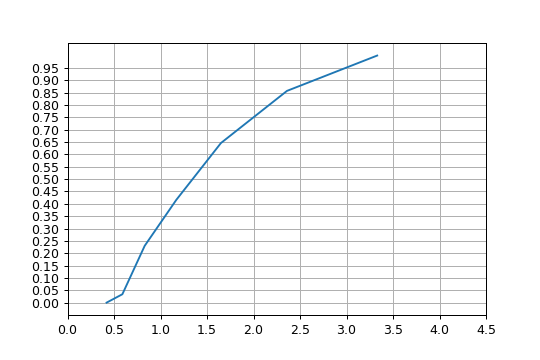

In [208]:
plt.plot('avg_part_size','cum_ovrsize',data=df)
plt.xticks(np.arange(0,5 , 0.5))     ###Ovrsize cum Plot
plt.yticks(np.arange(0, 1, 0.05))
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


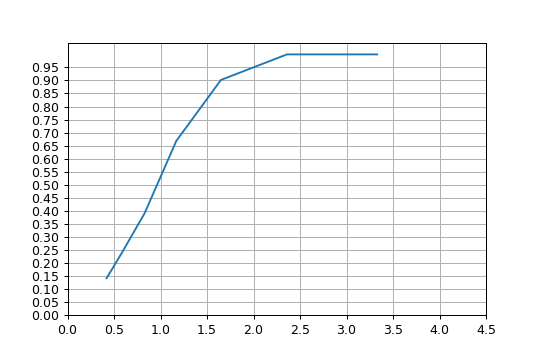

In [209]:
plt.plot(avg_part_size,cum_undrsize)
plt.xticks(np.arange(0,5 , 0.5))             ###Undersize Cumu Plot
plt.yticks(np.arange(0, 1, 0.05))
plt.grid()

### Efficiency Calculation for sieves

In [94]:
print('Input yf: ')
yf = float(input())
print('Input yp: ')
yp = float(input())
print('Input yr: ')
yr = float(input())

Input yf: 
0.25
Input yp: 
0.43
Input yr: 
0.15


In [96]:
con = (yf-yr)/(yp-yr)
Ec = con*(yp/yf)*(1-(con*((1-yp)/(1-yf))))

In [ ]:
print(Ec)

In [100]:
###In P/F terms

In [102]:
print('Input yf: ')
yf = float(input())
print('Input yp: ')
yp = float(input())
print('Input P: ')
P = float(input())
print('Input F: ')
F = float(input())

Input yf: 
0.1
Input yp: 
0.2
Input P: 
5
Input F: 
3


In [103]:
con = P/F
Ec = con*(yp/yf)*(1-(con*((1-yp)/(1-yf))))

In [104]:
print(Ec)

-1.6049382716049387


### Hydrocyclone Efficiency calculations

In [222]:
Cwf= 0.638  ##Percent solids in feed
Cwu = 0.748
Cwo = 0.5

In [223]:
Drf = (1-Cwf)/Cwf  ##Dilution ratio of feed
Dru = (1-Cwu)/Cwu
Dro = (1-Cwo)/Cwo

1.0

In [148]:
#F,U,O = 0,0,0 ##F is rate of dry solids in hydrocyclone feed, U is rate of dry solids in underflow

In [149]:
#F = U + O
#F = (Dru*U +Dro*O)/(Drf)     ###......Eqn A

In [243]:
Nomin_size = [0,878.5,442,251.5,177.5,125.5,89,0]
Nomin_size = np.array(Nomin_size)

In [244]:
wt_perc_undrflow = [0,0,5.9,9.0,11.7,11.2,7.9,54.3]
wt_perc_undrflow = np.array(wt_perc_undrflow)

In [245]:
wt_perc_ovrflow = [14.7,21.8,25,7.4,6.3,4.8,2.9,17.1]
wt_perc_ovrflow = np.array(wt_perc_ovrflow)

In [124]:
####From eqn A calculate UbyF, ObyF

In [246]:
UbyF = 0.653
ObyF = 1 - UbyF

In [247]:
col_D = UbyF*wt_perc_undrflow
col_E = ObyF*wt_perc_ovrflow

In [248]:
col_F = col_D + col_E

In [249]:
col_H = (col_D/col_F) * 100 ###Partition coeff

In [250]:
###Flow ratio Rf
Rf = (Dru/Drf)*(UbyF)

In [251]:
Rf

0.38772538186545347

In [252]:
col_Yc = (((col_H/100) - Rf)/(1-Rf))*100   ###Corrected partition coeff

In [253]:
df3 = pd.DataFrame([Nomin_size,wt_perc_undrflow,wt_perc_ovrflow,col_D,col_E,col_F ,col_H,col_Yc])

In [255]:
#df3=df3.T
#df3
df3.T

,0,1,2,3,4,5,6,7
0,0.0,0.0,14.7,0.0000,5.1009,5.1009,0.000000,-63.325405
1,878.5,0.0,21.8,0.0000,7.5646,7.5646,0.000000,-63.325405
2,442.0,5.9,25.0,3.8527,8.6750,12.5277,30.753450,-13.097208
3,251.5,9.0,7.4,5.8770,2.5678,8.4448,69.593122,50.337844
4,177.5,11.7,6.3,7.6401,2.1861,9.8262,77.752336,63.663912
5,125.5,11.2,4.8,7.3136,1.6656,8.9792,81.450463,69.703894
6,89.0,7.9,2.9,5.1587,1.0063,6.1650,83.677210,73.340737
7,0.0,54.3,17.1,35.4579,5.9337,41.3916,85.664483,76.586458


In [187]:
import mplcursors

<IPython.core.display.Javascript object>


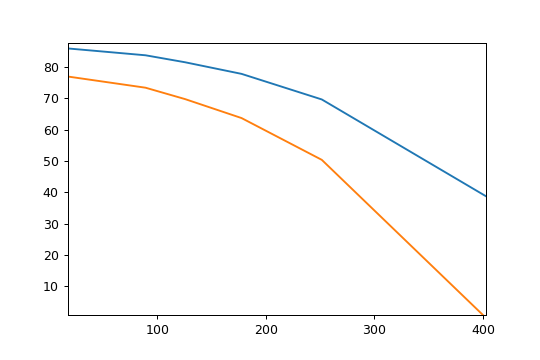

In [241]:
plt.plot( Nomin_size,col_H)  ###Partition curve
plt.xticks(np.arange(0,1000 , 100))           
plt.yticks(np.arange(0, 100, 10))
plt.grid()

In [242]:
plt.plot( Nomin_size,col_Yc )  ###Corrected Partition curve
plt.xticks(np.arange(0,1000 , 100))            
plt.yticks(np.arange(0, 100, 10))
#labels= ['a','b','c']
plt.grid()
mplcursors.cursor()
plt.show()

In [213]:
#!pip install mplcursors